In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style="whitegrid")
%matplotlib inline

In [12]:
df2 = pd.read_csv("trades_round_5_day_2.csv", sep=";")
df3 = pd.read_csv("trades_round_5_day_3.csv", sep=";")
df4 = pd.read_csv("trades_round_5_day_4.csv", sep=";")
trades = pd.concat([df2, df3, df4])

In [13]:
trades["price"] = trades["price"].astype(float)
trades["quantity"] = trades["quantity"].astype(int)
trades["timestamp"] = trades["timestamp"].astype(int)
symbols = ["PICNIC_BASKET1", "PICNIC_BASKET2", "CROISSANTS", "JAMS", "DJEMBE"]
bots = ["Caesar", "Paris", "Charlie"]
trades = trades[trades["symbol"].isin(symbols)]

In [14]:
def tag_side(row, bot):
    if row["buyer"] == bot:
        return "buy"
    elif row["seller"] == bot:
        return "sell"
    else:
        return None

/Users/lavinialei/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


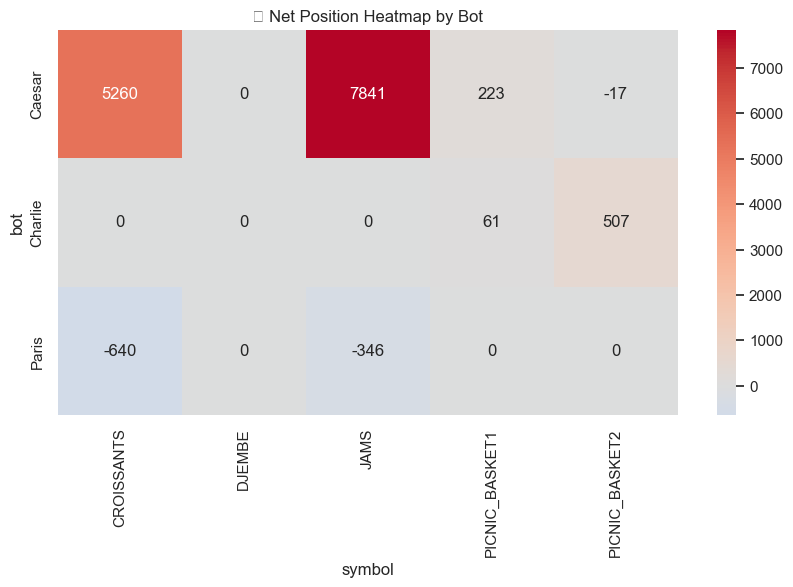

In [15]:
summary = []
for bot in bots:
    for symbol in symbols:
        sub = trades[(trades["buyer"] == bot) | (trades["seller"] == bot)]
        bot_symbol = sub[sub["symbol"] == symbol]
        buys = bot_symbol[bot_symbol["buyer"] == bot]["quantity"].sum()
        sells = bot_symbol[bot_symbol["seller"] == bot]["quantity"].sum()
        summary.append({
            "bot": bot,
            "symbol": symbol,
            "net_position": buys - sells
        })

pivot = pd.DataFrame(summary).pivot(index="bot", columns="symbol", values="net_position")
plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt="d", center=0, cmap="coolwarm")
plt.title("🔍 Net Position Heatmap by Bot")
plt.show()

/var/folders/hj/llctqbl91_gdds_gqxbf6pnm0000gn/T/ipykernel_30446/3955792132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_trades["side"] = bot_trades.apply(lambda row: tag_side(row, bot_focus), axis=1)
/var/folders/hj/llctqbl91_gdds_gqxbf6pnm0000gn/T/ipykernel_30446/3955792132.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=bot_trades, x="timestamp", y="quantity", hue="side", estimator="sum", ci=None)
/Users/lavinialei/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


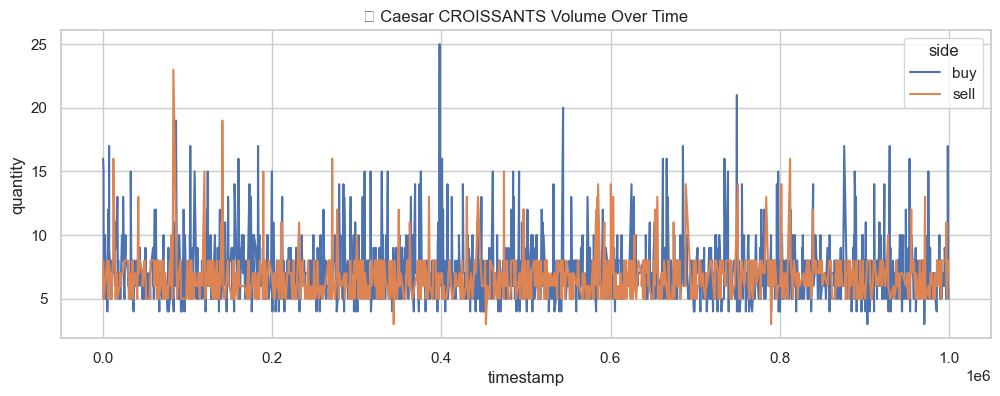

In [22]:
symbol_focus = "CROISSANTS"
bot_focus = "Caesar"
bot_trades = trades[(trades["symbol"] == symbol_focus) & 
                    ((trades["buyer"] == bot_focus) | (trades["seller"] == bot_focus))]
bot_trades["side"] = bot_trades.apply(lambda row: tag_side(row, bot_focus), axis=1)

plt.figure(figsize=(12, 4))
sns.lineplot(data=bot_trades, x="timestamp", y="quantity", hue="side", estimator="sum", ci=None)
plt.title(f"📈 {bot_focus} {symbol_focus} Volume Over Time")
plt.show()

/var/folders/hj/llctqbl91_gdds_gqxbf6pnm0000gn/T/ipykernel_30446/2174897713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_trades["side"] = bot_trades.apply(lambda row: tag_side(row, bot_focus), axis=1)
/var/folders/hj/llctqbl91_gdds_gqxbf6pnm0000gn/T/ipykernel_30446/2174897713.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=bot_trades, x="timestamp", y="quantity", hue="side", estimator="sum", ci=None)
/Users/lavinialei/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


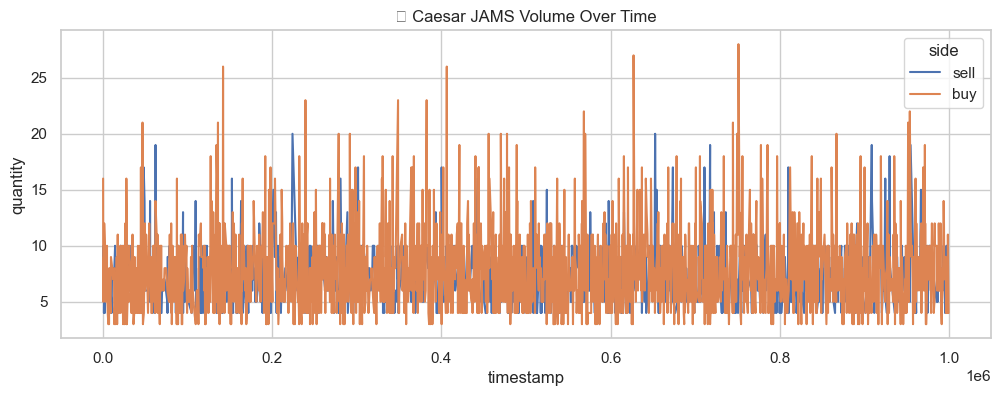

In [23]:
symbol_focus = "JAMS"
bot_focus = "Caesar"
bot_trades = trades[(trades["symbol"] == symbol_focus) & 
                    ((trades["buyer"] == bot_focus) | (trades["seller"] == bot_focus))]
bot_trades["side"] = bot_trades.apply(lambda row: tag_side(row, bot_focus), axis=1)

plt.figure(figsize=(12, 4))
sns.lineplot(data=bot_trades, x="timestamp", y="quantity", hue="side", estimator="sum", ci=None)
plt.title(f"📈 {bot_focus} {symbol_focus} Volume Over Time")
plt.show()

In [19]:
trades["time_bin"] = (trades["timestamp"] // 500) * 500

basket_df = trades[trades["symbol"] == "PICNIC_BASKET2"]
basket_price_change = basket_df.groupby("time_bin")["price"].mean().diff()

jam_activity = trades[trades["symbol"] == "JAMS"].groupby("time_bin")["quantity"].sum()


/Users/lavinialei/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


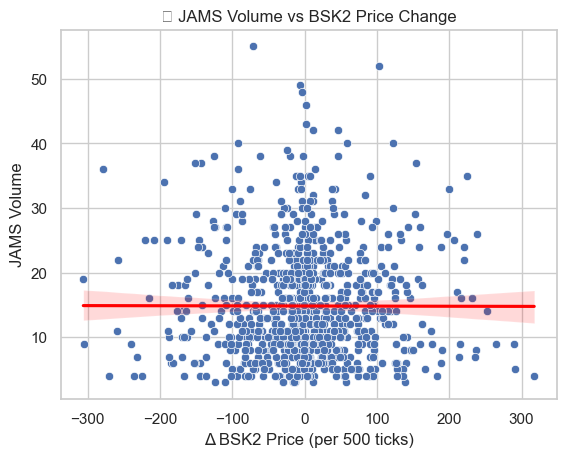

In [20]:
df_corr = pd.DataFrame({
    "BSK2_price_change": basket_price_change,
    "JAMS_volume": jam_activity
}).dropna()

sns.scatterplot(data=df_corr, x="BSK2_price_change", y="JAMS_volume")
sns.regplot(data=df_corr, x="BSK2_price_change", y="JAMS_volume", scatter=False, color="red")
plt.title("📊 JAMS Volume vs BSK2 Price Change")
plt.xlabel("Δ BSK2 Price (per 500 ticks)")
plt.ylabel("JAMS Volume")
plt.show()

/Users/lavinialei/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128339 (\N{CLOCK FACE FOUR OCLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


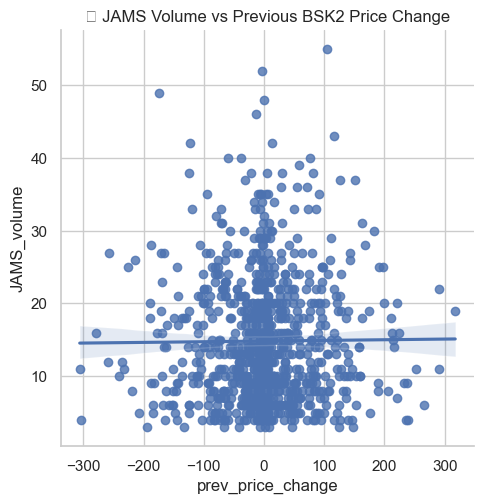

In [21]:
lagged = df_corr.copy()
lagged["prev_price_change"] = lagged["BSK2_price_change"].shift(1)
sns.lmplot(data=lagged, x="prev_price_change", y="JAMS_volume")
plt.title("🕓 JAMS Volume vs Previous BSK2 Price Change")
plt.show()